# Year 2023 Day 24


TODO Use Link Mark to materialize vectors https://observablehq.com/plot/marks/link
Reuse notebook 202311
Use 2d simplification for vector explanation then pythreejs
for interactive 3d visu, maybe evn anim?

Note: might also be perfect for visualizing the inputs from 202322 (falling bricks)

See https://pythreejs.readthedocs.io/en/stable/examples/Geometries.html fo threejs examples

See https://pythreejs.readthedocs.io/en/stable/examples/Geometries.html
and https://github.com/jupyter-widgets/pythreejs/blob/ebf601e805547e3ae6f656d3fe4ff89aa5ab2dac/examples/Geometries.ipynb
for example of successful notebook pre-rendering with pythreejs widgets

Note: This works when the notebook is left empty and then computed during the sphinx build
It does not work if it is pre-ran manually
So, the integration of notebook generation in the build process (GitHub action) is unavoidable,
at least for some that does not require heavy dependencies (unlike graphviz for instance)
Hopefully, JS-leaning notebooks using pythreejs and pyobservable plot should be easier to build.


In [244]:
from pyobsplot import Obsplot, Plot


op = Obsplot(renderer="jsdom", theme="dark")  # Literal['current','light','dark']

In [245]:
from advent_of_code.common.common import get_example_inputs_file_contents
from advent_of_code.y_2023.problem_202324 import AdventOfCodeProblem202324


problem = AdventOfCodeProblem202324()
problem

AdventOfCodeProblem202324(year=2023, day=24)

## Part 1

In Part 1, the z-axis is ignored.


### With Example Input


In [246]:
example_input = get_example_inputs_file_contents(2023)["test_problem_202324"][
    "EXAMPLE_INPUT"
]

In [247]:
example_hailstones = problem.parse_text_input(example_input)
example_hailstones

[Hailstone(position=array([19, 13, 30]), velocity=array([-2,  1, -2])),
 Hailstone(position=array([18, 19, 22]), velocity=array([-1, -1, -2])),
 Hailstone(position=array([20, 25, 34]), velocity=array([-2, -2, -4])),
 Hailstone(position=array([12, 31, 28]), velocity=array([-1, -2, -1])),
 Hailstone(position=array([20, 19, 15]), velocity=array([ 1, -5, -3]))]

In [248]:
import pandas as pd

from advent_of_code.y_2023.problem_202324 import Hailstone


def compute_vectors(hailstones: list[Hailstone], *, time_in_ns: int = 1):
    return pd.DataFrame(
        [
            (h.px, h.py, h.px + time_in_ns * h.vx, h.py + time_in_ns * h.vy, time_in_ns)
            for h in hailstones
        ],
        columns=["x1", "y1", "x2", "y2", "time_in_ns"],
    )


example_vectors = compute_vectors(example_hailstones, time_in_ns=1)
example_vectors

,x1,y1,x2,y2,time_in_ns
0,19,13,17,14,1
1,18,19,17,18,1
2,20,25,18,23,1
3,12,31,11,29,1
4,20,19,21,14,1


In [280]:
def show_links(
    lines_df: pd.DataFrame,
    *,
    rock_df: pd.DataFrame | None = None,
    width=400,
    strokeWidth=2,
    strokeOpacity=1,
    x_domain_test_area=(7, 27),
    y_domain_test_area=(7, 27),
    do_highlight_text=False,
    scheme="Observable10",
    rock_text_fill="#faa",
    rock_strokeWidth=2,
    rock_strokeDasharray="3",
    title: str | None = None,
):
    # lines_df : DataFrame with columns x1	y1	x2	y2
    marks = [
        Plot.link(
            lines_df,
            dict(
                x1=lines_df["x1"].to_list(),
                y1=lines_df["y1"].to_list(),
                x2=lines_df["x2"].to_list(),
                y2=lines_df["y2"].to_list(),
                markerEnd="arrow",
                curve="linear",
                strokeWidth=strokeWidth,
                strokeOpacity=strokeOpacity,
                stroke=lines_df["time_in_ns"].to_list(),
            ),
        ),
        Plot.rect(
            pd.DataFrame.from_records(
                {
                    "x1": [x_domain_test_area[0]],
                    "x2": [x_domain_test_area[1]],
                    "y1": [y_domain_test_area[0]],
                    "y2": [y_domain_test_area[1]],
                }
            ),
            {
                "x1": "x1",
                "y1": "y1",
                "x2": "x2",
                "y2": "y2",
                "stroke": "currentColor",
            },
        ),
        Plot.text(
            lines_df,
            {
                "x": lines_df["x2"].to_list(),
                "y": lines_df["y2"].to_list(),
                "text": lines_df["time_in_ns"].to_list(),
                "fill": "currentColor",
                "stroke": "black",
                "dy": -12,
                "filter": "highlight" if do_highlight_text else None,
            },
        ),
    ]

    if rock_df is not None:
        marks.extend(
            [
                Plot.link(
                    rock_df,
                    dict(
                        x1=rock_df["x1"].to_list(),
                        y1=rock_df["y1"].to_list(),
                        x2=rock_df["x2"].to_list(),
                        y2=rock_df["y2"].to_list(),
                        markerEnd="arrow",
                        strokeOpacity=1,
                        curve="linear",
                        strokeWidth=rock_strokeWidth,
                        strokeDasharray=rock_strokeDasharray,
                        # stroke=rock_df["time_in_ns"].to_list(),
                        stroke="red",
                        # headAngle=30,
                    ),
                ),
                Plot.text(
                    rock_df,
                    {
                        "x": rock_df["x2"].to_list(),
                        "y": rock_df["y2"].to_list(),
                        "text": rock_df["time_in_ns"].to_list(),
                        "fill": rock_text_fill,
                        "stroke": "black",
                        "dy": -12,
                    },
                ),
            ]
        )

    return op(  # type: ignore
        dict(
            grid=True,
            x=dict(
                label="x",
                tickFormat=".0s",
                nice=True,
                # domain=list(x_domain),
                ticks=10,
            ),
            y=dict(
                label="y",
                tickFormat=".0s",
                nice=True,
                # domain=list(y_domain),
                ticks=10,
            ),
            color={"type": "categorical", "scheme": scheme},
            marks=marks,
            aspectRatio=1,
            width=width,
            title=title,
        )
    )

The first diagram shows the position vectors, relative to their initial position, as defined in the example input.
Their direction is indicated by the arrow symbol.
A small floating text indicates the time for which the position was computed; $t=1$ in this first plot.

The test area, defined by $x = [7, 27]$ and $y = [7, 27]$ is materialized by a white box.


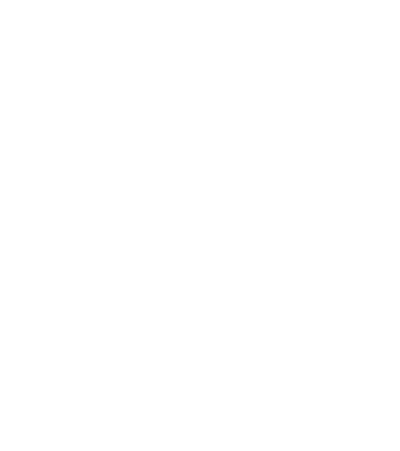

In [250]:
show_links(compute_vectors(example_hailstones, time_in_ns=1))

In the next plot, the successive **relative position vectors** are shown for $t=1, t=10, t=30$


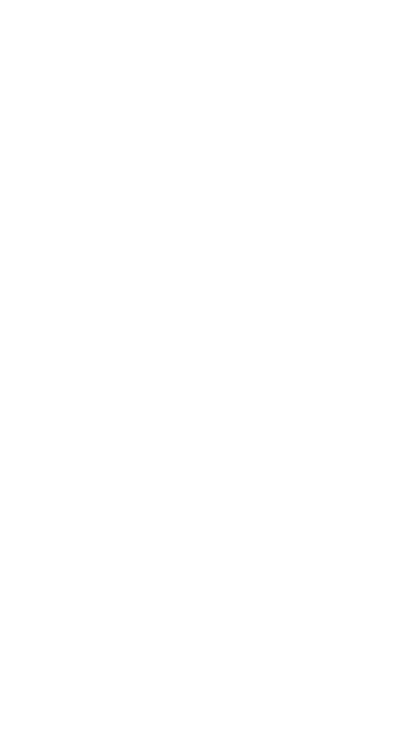

In [251]:
show_links(
    pd.concat([compute_vectors(example_hailstones, time_in_ns=t) for t in [10, 1]]),
    strokeWidth=1,
)

We can visually assess that 2 hailstones' future paths cross inside the boundary of the test area, as mentioned in the problem input.


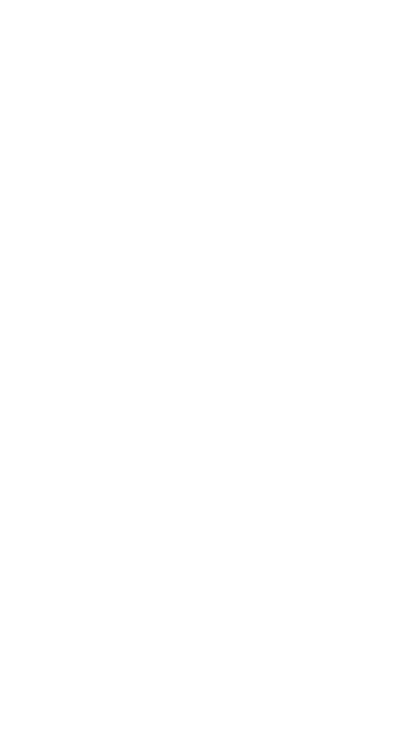

In [252]:
show_links(
    pd.concat([compute_vectors(example_hailstones, time_in_ns=t) for t in [30, 10, 1]]),
    strokeWidth=1,
)

Finally, this plot is similar to the first one, but computed with `t=100` instead of `t=1`.


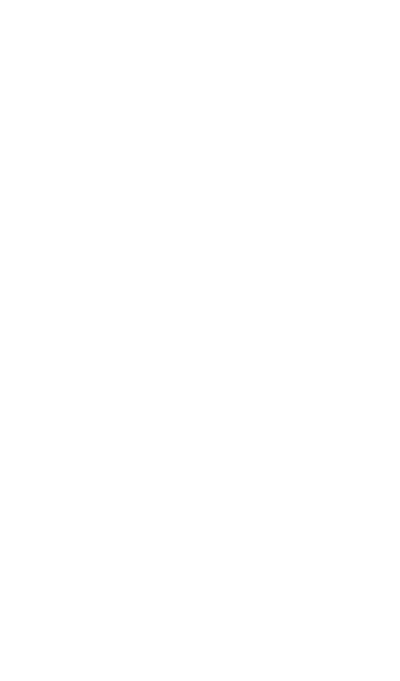

In [253]:
show_links(
    pd.concat([compute_vectors(example_hailstones, time_in_ns=t) for t in [100]]),
    strokeWidth=1,
)

We can see that some hailstones' trajectories seem to never cross.


### With Actual Input


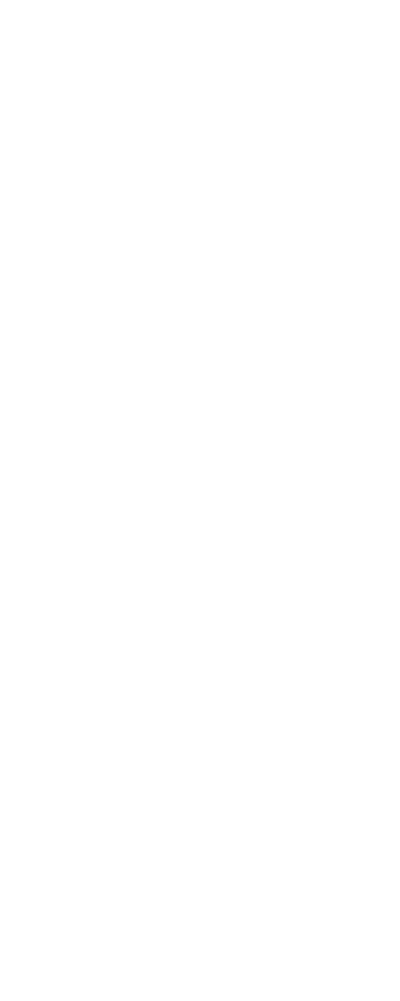

In [294]:
actual_hailstones = problem.parse_input_text_file()
base_time = 1e11
times = [base_time * 10, base_time * 5, base_time]

actual_hailstones_df = pd.concat(
    [compute_vectors(actual_hailstones, time_in_ns=t) for t in times],
)
domain = [200000000000000, 400000000000000]

show_links(
    actual_hailstones_df,
    strokeWidth=1,
    strokeOpacity=0.4,
    x_domain_test_area=domain,
    y_domain_test_area=domain,
    scheme="Set3",
    do_highlight_text=True,  # Only keep some text to avoid clutter
)

## Part 2


### With Example Input


The problem description gives the initial position and velocity of a rock that would intersect with every hailstones.


In [255]:
import numpy as np

rock = Hailstone(position=np.array([24, 13, 10]), velocity=np.array([-3, 1, 2]))

rock_df = compute_vectors([rock], time_in_ns=1)
rock_df

,x1,y1,x2,y2,time_in_ns
0,24,13,21,14,1


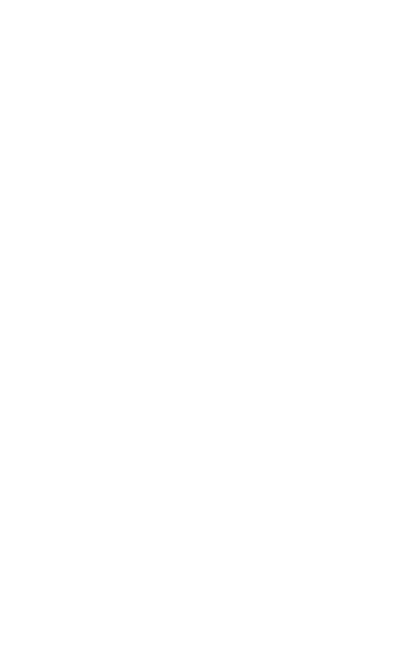

In [256]:
times = [10, 1]
show_links(
    pd.concat([compute_vectors(example_hailstones, time_in_ns=t) for t in times]),
    rock_df=pd.concat([compute_vectors([rock], time_in_ns=t) for t in times]),
    strokeWidth=1,
)

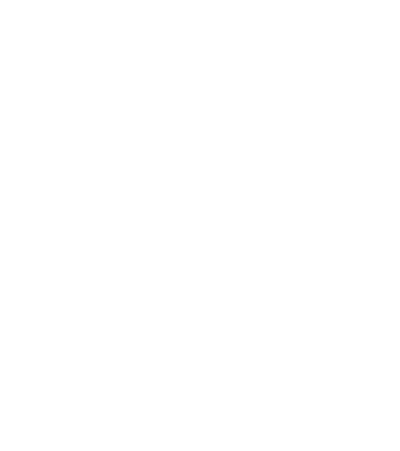

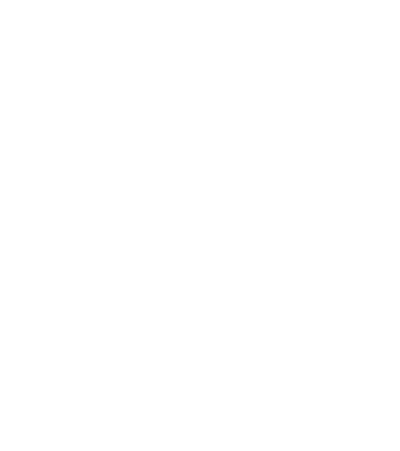

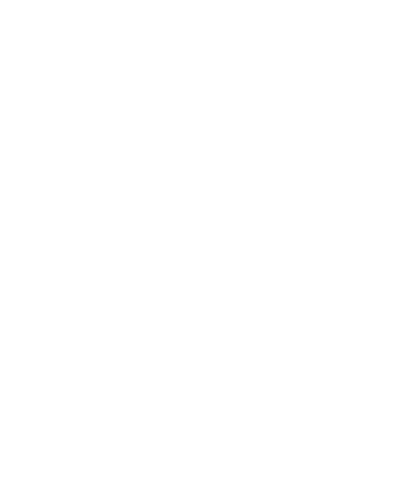

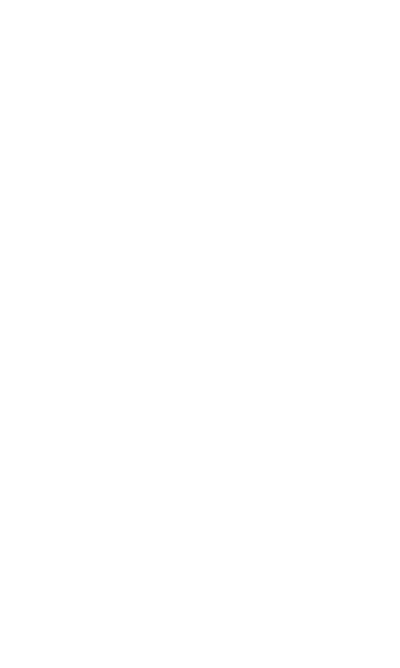

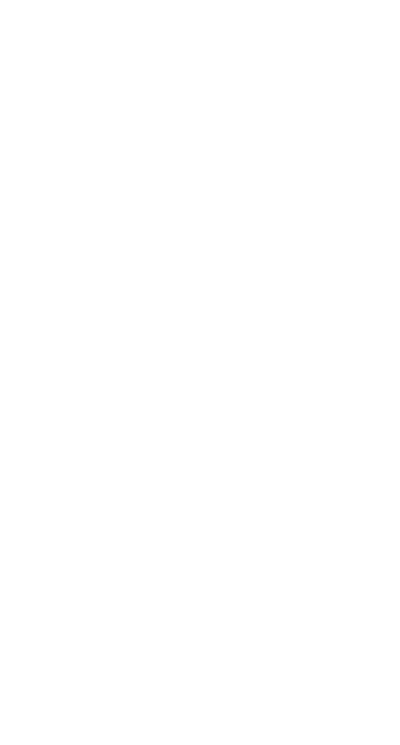

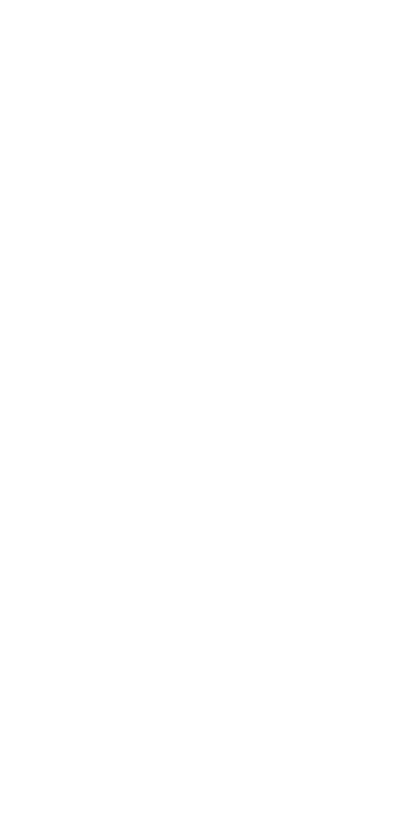

In [257]:
for i in range(1 + 1, 6 + 1 + 1):
    times = list(reversed(range(1, i)))
    show_links(
        pd.concat([compute_vectors(example_hailstones, time_in_ns=t) for t in times]),
        rock_df=pd.concat([compute_vectors([rock], time_in_ns=t) for t in times]),
        strokeWidth=1,
    )

We can visually assess that the thrown rock intersects the 5 hailstones on integer times, at $t=1,3,4,5,6$.

Then, this must be formalized.

We introduce $p_i$ and $v_i$, 3D vectors, where $i$ is the hailstone identifier.

- $p_i$ is the position vector of the hailstone $i$.
- $v_i$ is the velocity vector of the hailstone $i$.

The position of the hailstone $i$ at any time $t$ is given, relative to its initial position $p_i(t=0)$, by:

$$\begin{equation}p_i = p_i(t) = p_i(t = 0) + t . v_i   \tag{1.1} \end{equation}$$

Note that the velocity is constant and do not depend on time (no acceleration).

The rock to be thrown follows a similar equation:

$$\begin{equation}r = p_r = p_r(t) = p_r(t = 0) + t . v_r   \tag{1.2} \end{equation}$$

$p_r(t = 0)$ and $v_r$ are unknown and must be determined to solve the problem.

During a collision, the position vector of the rock, $r(t)$, a 3D vector, is equal to the position vector of the hit hailstone. Let's denote $t_i$ the time of collision between the rock and the hailstone $i$. Note: $t_0 \ne 0$, $0$ is the hailstone identifier. We must have for all hailstones:

$$\begin{equation}r(t_i) = p_i(t_i)\end{equation}   \tag{2}$$

All **relative position vectors** (in red in the plots above) are collinear between each other, and collinear to the velocity vector of the rock to be thrown (an unknown). This means that for any $t_a$, $t_b$ and $t_c$ we have the following linear equation:

$$\begin{equation}r(t_b) - r(t_a) = \lambda (r(t_c) - r(t_a))   \tag{3} \end{equation}$$

where $\lambda$ is the scale factor / collinearity coefficient

We can add more of these equations by using the times of collision.

$$
\begin{equation}
\begin{aligned}
(r(t_2) - r(t_0)) &= \lambda_2 (r(t_1) - r(t_0))
\newline
(r(t_3) - r(t_0)) &= \lambda_3 (r(t_1) - r(t_0))
\newline
...
\newline
(r(t_n) - r(t_0)) &= \lambda_3 (r(t_1) - r(t_0))
\end{aligned}
\tag{4}
\end{equation}
$$

_In the following, only two of these equations are kept, as it is the minimal amount of equations needed to solve the problem. The reason why is detailed further down._

By substituting $r_i$ using $(2)$ we get:

$$
\begin{equation}
\begin{aligned}
(p_2(t_2) - p_0(t_0)) &= \lambda_2 (p_1(t_1) - p_0(t_0))
\newline
(p_3(t_3) - p_0(t_0)) &= \lambda_3 (p_1(t_1) - p_0(t_0))
\end{aligned}
\tag{5}
\end{equation}
$$

By substituting the $p_i$ using $(1)$ we get:

$$
\begin{equation}
\begin{aligned}
(p_2(t = 0) + t_2 . v_2 - p_0(t = 0) + t_0 . v_0) &= \lambda_2 (p_1(t = 0) + t_1 . v_1 - p_0(t = 0) + t_0 . v_0)
\newline
(p_3(t = 0) + t_3 . v_3 - p_0(t = 0) + t_0 . v_0) &= \lambda_3 (p_1(t = 0) + t_1 . v_1 - p_0(t = 0) + t_0 . v_0)
\end{aligned}
\tag{5}
\end{equation}
$$

The initial positions of each hailstone are known: $p_0(t = 0)$, $p_1(t = 0)$, $p_2(t = 0)$, $p_3(t = 0)$, as well as their constant velocity: $v_0$, $v_1$, $v_2$, $v_3$.

The unknowns are the times of collision between the rock and the hailstone $i$: $t_0$, $t_1$, $t_2$, $t_3$, as well as the scale factors, $\lambda_2$ and $\lambda_3$. This is a total of 6 unknown dispatched in 2 linear equations involving 3D vectors. By developing the 3D vectors into their $x, y, z$ components, we finally get a set of 6 equations with 6 unknowns:


$$
\begin{equation}
\begin{aligned}
(p_{2,x}(0) + t_2 . v_{2,x} - p_{0,x}(0) + t_0 . v_{0,x}) &= \lambda_2 (p_{1,x}(0) + t_1 . v_{1,x} - p_{0,x}(0) + t_0 . v_{0,x})
\newline
(p_{2,y}(0) + t_2 . v_{2,y} - p_{0,y}(0) + t_0 . v_{0,y}) &= \lambda_2 (p_{1,y}(0) + t_1 . v_{1,y} - p_{0,y}(0) + t_0 . v_{0,y})
\newline
(p_{2,z}(0) + t_2 . v_{2,z} - p_{0,z}(0) + t_0 . v_{0,z}) &= \lambda_2 (p_{1,z}(0) + t_1 . v_{1,z} - p_{0,z}(0) + t_0 . v_{0,z})
\newline
\newline
(p_{3,x}(0) + t_3 . v_{3,x} - p_{0,x}(0) + t_0 . v_{0,x}) &= \lambda_3 (p_{1,x}(0) + t_1 . v_{1,x} - p_{0,x}(0) + t_0 . v_{0,x})
\newline
(p_{3,y}(0) + t_3 . v_{3,y} - p_{0,y}(0) + t_0 . v_{0,y}) &= \lambda_3 (p_{1,y}(0) + t_1 . v_{1,y} - p_{0,y}(0) + t_0 . v_{0,y})
\newline
(p_{3,z}(0) + t_3 . v_{3,z} - p_{0,z}(0) + t_0 . v_{0,z}) &= \lambda_3 (p_{1,z}(0) + t_1 . v_{1,z} - p_{0,z}(0) + t_0 . v_{0,z})
\newline
\end{aligned}
\tag{6}
\end{equation}
$$

This system of equations can be fed to a symbolic mathematics equation solver, [SymPy](https://www.sympy.org/en/index.html). See [Solvers](https://docs.sympy.org/latest/modules/solvers/solvers.html) on SymPy's documentation.

Note regarding the amount of equations: with only one 3D equation instead of two, we would have had only 3 equations and 4 unknowns: $t_0$, $t_1$, $t_2$, as well as the scale factors, and $\lambda_3$. Hence, adding a second equation is necessary to get a solvable system.

Once solved, the following unknowns are now known: $t_0$, $t_1$, $t_2$, $t_3$, as well as the scale factors, $\lambda_2$ and $\lambda_3$. They can be used to find the initial position vector of the rock to be thrown, the data required to solve the problem.


For any $k \in \{1,2,3\}$, the position of the rock is a function of the time and can be found, because we have two positions and their respective times the rock must be at.

We need to alter a little bit the equation of $(1)$.

First, let's express the rock's velocity vector $v_r$ with the new known variables. Remainder: at collision time, $r(t_i) = p_i(t_i)$

$$v_r = \frac{r(t_k) + r(t_0)}{t_k-t_0} = \frac{p_k(t_k) + p_0(t_0)}{t_k-t_0}$$

First, we can use a new way to express the rock's position: instead of using $t=0$ as a reference, we use $t_0$, the time of collision with the rock $0$.

$$
\begin{aligned}
\newline
r(t) &= r(t_0) + (t - t_0) . v_r
\newline
r(t) &= p_0(t_0) + (t - t_0) \frac{p_k(t_k) + p_0(t_0)}{t_k-t_0}

\end{aligned}


$$

The initial position can be found by applying this expression to $t = 0$.

$$
\begin{aligned}

\newline
r(t = 0) &= p_0(t_0) - t_0 \frac{p_k(t_k) + p_0(t_0)}{t_k-t_0}
\newline
r(t = 0) &=   \frac{(t_k - t_0) p_0(t_0) - t_0 p_k(t_k) + t_0 p_0(t_0)}{t_k-t_0}
\newline
r(t = 0) &=   \frac{t_k p_0(t_0) - t_0 p_0(t_0)  - t_0 p_k(t_k) + t_0 p_0(t_0)}{t_k-t_0}
\newline
r(t = 0) &=   \frac{t_k p_0(t_0)   - t_0 p_k(t_k) }{t_k-t_0}

\end{aligned}


$$


In [258]:
from advent_of_code.y_2023.problem_202324 import solve_equation_system


p = [[h.px, h.py, h.pz] for h in example_hailstones[:4]]
v = [[h.vx, h.vy, h.vz] for h in example_hailstones[:4]]

s = solve_equation_system(p, v)
t0, t1, t2, t3, l2, l3 = s
print(f"{t0=}, {t1=}, {t2=}, {t3=}, {l2=}, {l3=}")

t0=5, t1=3, t2=4, t3=6, l2=1/2, l3=-1/2


In [259]:
from advent_of_code.y_2023.problem_202324 import compute_rock_coords


k = 1
computed_rock = compute_rock_coords(s, k, p, v)
computed_rock

[24, 13, 10]

The initial rock position computed with the solutions from the system of equations is identical to what the problem description gave:


In [260]:
computed_rock == [rock.px, rock.py, rock.pz]

True

Collision of the rock with hailstone at time=3


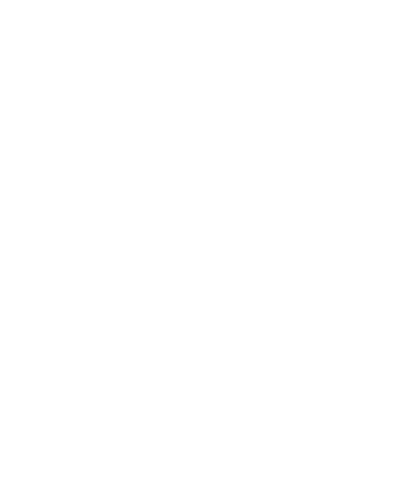

Collision of the rock with hailstone at time=4


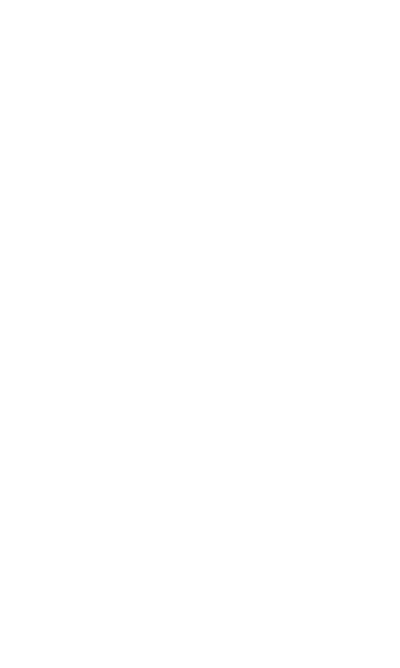

Collision of the rock with hailstone at time=5


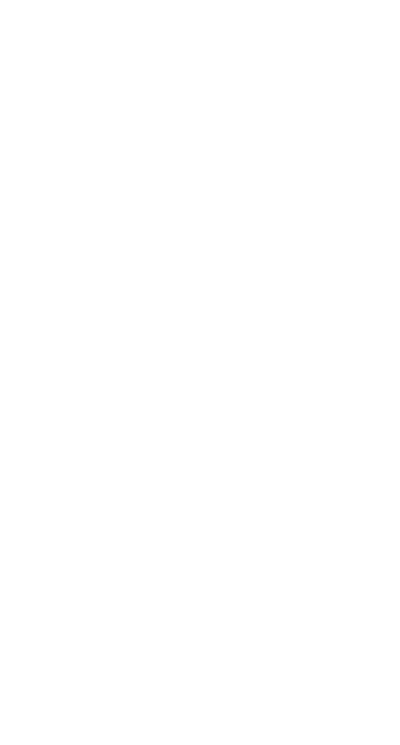

Collision of the rock with hailstone at time=6


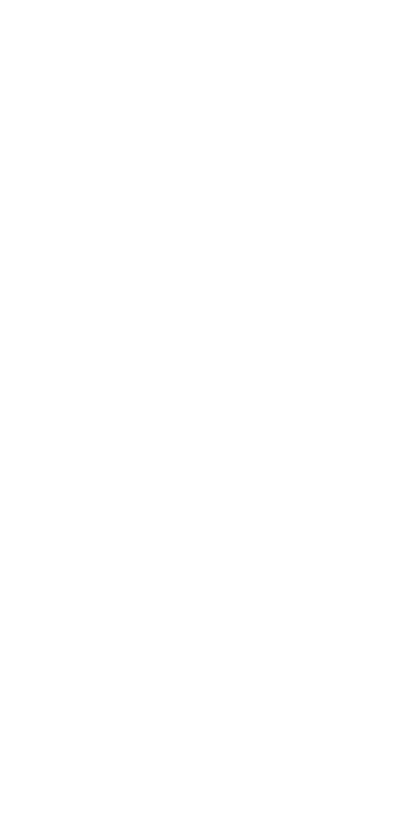

In [261]:
for time in sorted((t0, t1, t2, t3)):
    print(f"Collision of the rock with hailstone at {time=}")
    times = list(reversed(range(1, time + 1)))
    show_links(
        pd.concat([compute_vectors(example_hailstones, time_in_ns=t) for t in times]),
        rock_df=pd.concat([compute_vectors([rock], time_in_ns=t) for t in times]),
        strokeWidth=1,
    )

### With Actual Input


The visualization is done in 2D, as collinear 3D vectors also are in a 2D plane.

The plot from Part 1 is reused, with the rock trajectory added in red.

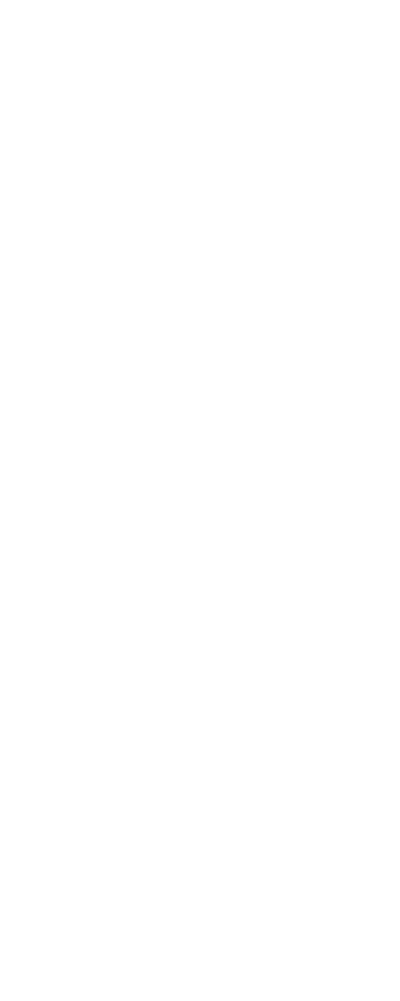

In [296]:
def compute_hailstone_position(h: Hailstone, time_in_ns: int) -> np.array:
    return np.array(
        (
            (h.px) + time_in_ns * (h.vx),
            (h.py) + time_in_ns * (h.vy),
            (h.pz) + time_in_ns * (h.vz),
        )
    )


def visualize_actual_input_results(actual_hailstones: list[Hailstone]):
    p = [[h.px, h.py, h.pz] for h in actual_hailstones[:4]]
    v = [[h.vx, h.vy, h.vz] for h in actual_hailstones[:4]]

    s = solve_equation_system(p, v)
    t0, t1 = s[:2]

    k = 1
    rock_position = np.array(compute_rock_coords(s, k, p, v), dtype=np.int64)
    rock_velocity = np.array((
        compute_hailstone_position(actual_hailstones[1], t1)
        - compute_hailstone_position(actual_hailstones[0], t0)
    ) / (t1 - t0), dtype=np.int64)
    rock = Hailstone(position=rock_position, velocity=rock_velocity)

    base_time = 1e11
    times = [base_time * 10, base_time * 5, base_time]

    hailstones_df = pd.concat(
        [compute_vectors(actual_hailstones, time_in_ns=t) for t in times]
    )

    rock_df = pd.concat([compute_vectors([rock], time_in_ns=t) for t in times])

    domain = [200000000000000, 400000000000000]
    show_links(
        hailstones_df,
        rock_df=rock_df,
        strokeWidth=1,
        strokeOpacity=.4,
        x_domain_test_area=domain,
        y_domain_test_area=domain,
        scheme="Set3",
        rock_strokeWidth=3,
        rock_strokeDasharray="",
        do_highlight_text=True,  # Only keep some text to avoid clutter
    )


visualize_actual_input_results(actual_hailstones)

## Observations

First, the input data is excessively large as only the first 4 hailstones were required to solve the problem. Indeed, the collinearity constraint is strong, leaving few degrees of freedom. The remaining hundreds of hailstones follow the same rules.


In [297]:
print(
    f"Percentage of used hailstones in the personalized input data : {4 / len(actual_hailstones):.2%}"
)

Percentage of used hailstones in the personalized input data : 1.33%


## Open Points

It could be interesting to add an animation showing the absolute position vectors "collapse" with time passing, becoming collinear at a singular time. Also, watching the various hailstones hitting the thrown rock's trajectory.